#ML - ReglasAsoc_ClouthingStore

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es aplicar la técnica de reglas de asociación sobre un conjunto de datos sencillos: </p>

##Instalación de la librería MLXTEND

Para el trabajo con Reglas de Asociación será necesario instalar la librería <b>mlxtend</b> de Python, donde se encuentran implementandos los algoritmos y funciones necesarias para la generación de reglas.
<p>Databricks no trae esa librería por defecto por lo que es necesario instalarla con el comando <b>PIP</b>. El comando PIP permite instalar librerías que no vengan por defecto en el ambiente de desarrollo.</p>
<p>Si no está trabajando con Databricks elimine el comando <b>%sh</b>.</p>

In [0]:
%sh
pip install mlxtend

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


##Cargar los datos

Para este ejercicio se estará utilizando un conjunto de datos sencillo, llamado ClothingStore, el conjunto representa transacciones de compras de productos, cada fila es una transaccion y donde se encuentre TRUE signfica que ese producto fue comprado en esa transacción, de lo contrario dirá FALSE:

<ul>
  <li>fuente de datos: <a href="https://www.dropbox.com/s/s599gjgvohafzl7/ClothingStore.csv?dl=1" target="_blank">https://www.dropbox.com/s/s599gjgvohafzl7/ClothingStore.csv?dl=1</a></li>
  <li>tipo de datos: csv</li>
</ul>

In [0]:
# Importar libreria requerida
import pandas as pd

# Leer datos desde archivo CSV
csv_path = "https://www.dropbox.com/s/s599gjgvohafzl7/ClothingStore.csv?dl=1"
df = pd.read_csv(csv_path,sep=";")

df.head(20)

,blouse,jeans,shoes,shorts,skirt,tshirt
0,True,False,False,False,False,False
1,False,False,True,False,True,True
2,False,True,False,False,False,True
3,False,True,True,False,False,True
4,False,True,False,True,False,False
5,False,False,True,False,False,True
6,False,True,False,True,True,False
7,False,True,True,False,False,True
8,False,True,False,False,False,False
9,False,True,True,False,False,True


Se puede realizar una visualización preliminar de los elementos, y mostrar la frecuencia de compra de cada uno de ellos. En el gráfico se puede observar que los elementos <b>jeans</b> y <b>tshirt</b> son los más comprados:

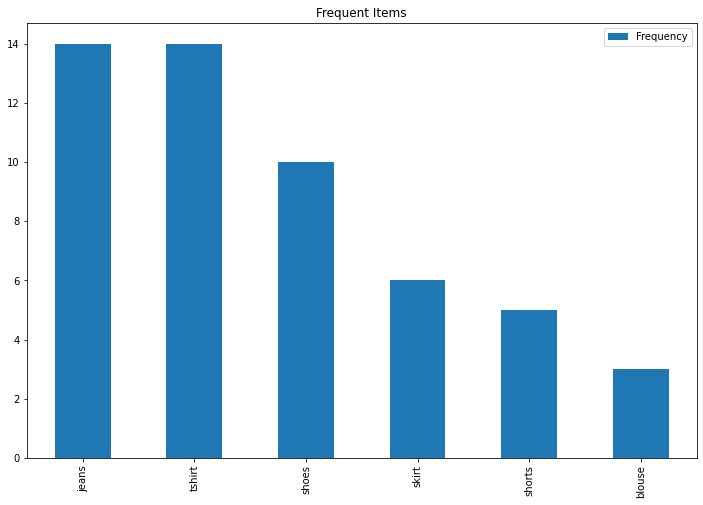

In [0]:
import matplotlib.pyplot as plt
df.sum().to_frame('Frequency').sort_values('Frequency',ascending=False).plot(kind='bar',figsize=(12,8),title="Frequent Items")
plt.show()

##Generando reglas

Para la generación de reglas el primer paso sería generar los conjuntos de items frecuentes para el conjunto de datos. Para ellos se pueden utilizar los algoritmos <b>apriori</b> o <b>fpgrowth</b>. Para generar los conjuntos de items frecuentes se utiliza como ejemplo un soporte de 0.2:

In [0]:
from mlxtend.frequent_patterns import apriori, fpgrowth
frequent_itemsets = fpgrowth(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.70,(tshirt)
1,0.50,(shoes)
2,0.30,(skirt)
3,0.70,(jeans)
4,0.25,(shorts)
5,0.50,"(tshirt, shoes)"
6,0.35,"(jeans, shoes)"
7,0.35,"(jeans, shoes, tshirt)"
8,0.20,"(tshirt, skirt)"
9,0.45,"(jeans, tshirt)"


Ahora se generan las reglas de asociación utilizando la función <b>association_rules</b>, la cual permite definir la métrica de interés a utilizar y el umbral mínimo permitido. Actualmente esta función permite utilizar las medidas de <b>confidence</b> y <b>lift</b>. Suponga que desea optener las reglas con una confianza mínima de 0.5:

In [0]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tshirt),(shoes),0.70,0.50,0.50,0.714286,1.428571,0.150,1.750000
1,(shoes),(tshirt),0.50,0.70,0.50,1.000000,1.428571,0.150,inf
2,(jeans),(shoes),0.70,0.50,0.35,0.500000,1.000000,0.000,1.000000
3,(shoes),(jeans),0.50,0.70,0.35,0.700000,1.000000,0.000,1.000000
4,"(jeans, shoes)",(tshirt),0.35,0.70,0.35,1.000000,1.428571,0.105,inf
5,"(jeans, tshirt)",(shoes),0.45,0.50,0.35,0.777778,1.555556,0.125,2.250000
6,"(tshirt, shoes)",(jeans),0.50,0.70,0.35,0.700000,1.000000,0.000,1.000000
7,(jeans),"(tshirt, shoes)",0.70,0.50,0.35,0.500000,1.000000,0.000,1.000000
8,(shoes),"(jeans, tshirt)",0.50,0.45,0.35,0.700000,1.555556,0.125,1.833333
9,(tshirt),"(jeans, shoes)",0.70,0.35,0.35,0.500000,1.428571,0.105,1.300000


Si se desea utilizar la métrica de <b>lift</b>, solo es necesario ajustar los parámetros:

In [0]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tshirt),(shoes),0.70,0.50,0.50,0.714286,1.428571,0.150,1.750000
1,(shoes),(tshirt),0.50,0.70,0.50,1.000000,1.428571,0.150,inf
2,(jeans),(shoes),0.70,0.50,0.35,0.500000,1.000000,0.000,1.000000
3,(shoes),(jeans),0.50,0.70,0.35,0.700000,1.000000,0.000,1.000000
4,"(jeans, shoes)",(tshirt),0.35,0.70,0.35,1.000000,1.428571,0.105,inf
5,"(jeans, tshirt)",(shoes),0.45,0.50,0.35,0.777778,1.555556,0.125,2.250000
6,"(tshirt, shoes)",(jeans),0.50,0.70,0.35,0.700000,1.000000,0.000,1.000000
7,(jeans),"(tshirt, shoes)",0.70,0.50,0.35,0.500000,1.000000,0.000,1.000000
8,(shoes),"(jeans, tshirt)",0.50,0.45,0.35,0.700000,1.555556,0.125,1.833333
9,(tshirt),"(jeans, shoes)",0.70,0.35,0.35,0.500000,1.428571,0.105,1.300000
